# Multiple Sclerosis Disease (다발성 경화증)
####  - 중추신경계 질환으로 뇌와 척수에 걸쳐서 작은 탈수 변화가 되풀이하여 산발적으로 일어나는 병

- Clinically Isolated Syndrome (임상적 단독 증후군) 증상이 발병했을 때 Multiple Sclerosis Disease(다발성 경화증)으로 전환이 될 지에 대한 예측을 해보자.

#### columns

- ID : index 번호와 겹쳐서 삭제함 
- Age: 환자의 나이 
- Schooling: 환자가 학교에 있는 기간...? (int로 바꿔도 될 것 같음, 소수로 되어있는 값이 없다.)
- Gender(성별): 1 = male, 2 = female
- Breastfeeding(모유 수유를 받았는지 ): 1 = yes, 2 = no, 3 = unknown
- Varicella(수두): 1=positive, 2=negative, 3=unknown
- Initial_Symptoms(초기 증상): 1=visual, 2=sensory, 3=motor, 4=other, 5= visual and sensory, 6=visual and motor, 7=visual and others, 8=sensory and motor, 9=sensory and other, 10=motor and other, 11=Visual, sensory and motor, 12=visual, sensory and other, 13=Visual, motor and other, 14=Sensory, motor and other, 15=visual,sensory,motor and other
- Mono(단 하나의 뚜렷한 증세?) _or_Polysymptomatic(두 개이상의 증세): 1 =monosymptomatic, 2=polysymptomatic, 3=unknown
- Oligoclonal_Bands(올리고클론의 띠, 다양한 신경학 및 혈액 질환의 진단에 사용되며 . 임상적으로 확실한 다발성 경화증 환자의 95% 이상의 CSF에 올리고클론 밴드가 존재한다고한다....): 0=negative, 1=positive, 2=unknown
- 말초신경 자극 후 중추신경계에서 신체감각 유발전위(SSEP)가 기록됩니다. ULSEP(상지 SSEP), LLSEP(하지 SSEP)
- LLSSEP(상지 SSEP): 0=negative, 1=positive
- ULSSEP(하지 SSEP):0=negative, 1=positive
- VEP(시각적 유발 전위):0=negative, 1=positive
- BAEP(두피에 배치된 전극에 의해 기록되는 청각 자극에 반응하여 매우 작은 청각 유발 전위입니다.): 0=negative, 1=positive
- Periventricular_MRI(mri로 확인한 뇌실주위 양성확인?):0=negative, 1=positive
- Cortical_MRI(대뇌피질...? 이게 증상인가....): 0=negative, 1=positive
- Infratentorial_MRI(천막하...?):0=negative, 1=positive
- Spinal_Cord_MRI(척수, 여기에 문제가 있다는건가,,,,?): 0=negative, 1=positive
- initial_EDSS(다발성 경화증의 장애를 정량화하고 시간에 따른 장애 수준의 변화를 모니터링하는 방법):? 결측치가 굉장히 많다 (처리 ? )
- final_EDSS:?
- Group: 1=CDMS, 2=non-CDMS

In [1]:
# 모듈불러오기

import pandas as pd        
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv', index_col = 0)
df.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [3]:
df.info() # 데이터 셋의 정보 확인 몇몇 변수에서 결측치를 확인할 수 있었다. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    int64  
 1   Age                      273 non-null    int64  
 2   Schooling                272 non-null    float64
 3   Breastfeeding            273 non-null    int64  
 4   Varicella                273 non-null    int64  
 5   Initial_Symptom          272 non-null    float64
 6   Mono_or_Polysymptomatic  273 non-null    int64  
 7   Oligoclonal_Bands        273 non-null    int64  
 8   LLSSEP                   273 non-null    int64  
 9   ULSSEP                   273 non-null    int64  
 10  VEP                      273 non-null    int64  
 11  BAEP                     273 non-null    int64  
 12  Periventricular_MRI      273 non-null    int64  
 13  Cortical_MRI             273 non-null    int64  
 14  Infratentorial_MRI       2

In [4]:
df.shape

(273, 19)

In [5]:
df['Schooling'].value_counts()

20.0    83
15.0    81
12.0    59
9.0     34
22.0     4
6.0      3
25.0     2
14.0     2
0.0      1
23.0     1
24.0     1
8.0      1
Name: Schooling, dtype: int64

<AxesSubplot:xlabel='Schooling', ylabel='Count'>

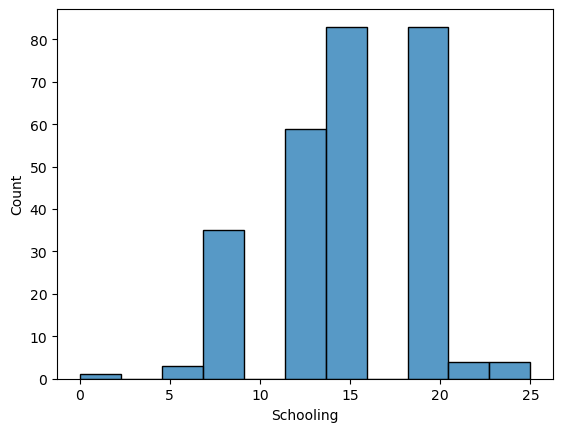

In [6]:
sns.histplot(df, x='Schooling')

In [7]:
df['group'].value_counts()

2    148
1    125
Name: group, dtype: int64

In [8]:
data = df.copy()
data

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


In [9]:
data.isnull().sum()

Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [10]:
data['Schooling'] = data['Schooling'].fillna(int(df['Schooling'].mode()))  # tODO: mode 결측치를 최빈값으로 채우기

In [11]:
data['Schooling'].isnull().sum()

0

In [12]:
data['Initial_Symptom'] = data['Initial_Symptom'].fillna(int(data['Initial_Symptom'].mode())) # 위와 마찬가지로 결측치를 최빈값으로 설정

In [13]:
data['Initial_Symptom']

0       2.0
1      10.0
2       3.0
3       7.0
4       6.0
       ... 
268     9.0
269     5.0
270    13.0
271    15.0
272     2.0
Name: Initial_Symptom, Length: 273, dtype: float64

In [14]:
data['Initial_Symptom'].isnull().sum()

0

In [15]:
data.head() # 데이터셋의 결측치 제거 후 데이터 셋 확인

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [16]:
data.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS', 'group'],
      dtype='object')

In [17]:
data[['Schooling', 'Initial_Symptom']] = data[['Schooling', 'Initial_Symptom']].astype('int64')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    int64  
 1   Age                      273 non-null    int64  
 2   Schooling                273 non-null    int64  
 3   Breastfeeding            273 non-null    int64  
 4   Varicella                273 non-null    int64  
 5   Initial_Symptom          273 non-null    int64  
 6   Mono_or_Polysymptomatic  273 non-null    int64  
 7   Oligoclonal_Bands        273 non-null    int64  
 8   LLSSEP                   273 non-null    int64  
 9   ULSSEP                   273 non-null    int64  
 10  VEP                      273 non-null    int64  
 11  BAEP                     273 non-null    int64  
 12  Periventricular_MRI      273 non-null    int64  
 13  Cortical_MRI             273 non-null    int64  
 14  Infratentorial_MRI       2

In [19]:
data1 = data.copy() # 데이터 시각화를 하기 위해 데이터셋 복사

In [20]:
gender = {1:'Male', 2: 'Female'}                           # 시각화 시에 xlabel의 이름을 쉽게 보기 위해 mapping을 위한 작업 수행
breastfeeding = {1: 'yes', 2:'no', 3:'unknown'}
varicella = {1 : 'positive', 2: 'negative', 3: 'unknown'}
group = {1: 'CDMS' , 2: 'Non-CDMS' }

In [21]:
data1['Gender'] = data1['Gender'].map(gender)            # mapping 진행
data1['Breastfeeding'] = data1['Breastfeeding'].map(breastfeeding)
data1['Varicella'] = data1['Varicella'].map(varicella)
data1['group'] = data1['group'].map(group)

In [22]:
data1.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS', 'group'],
      dtype='object')

<AxesSubplot:xlabel='group', ylabel='count'>

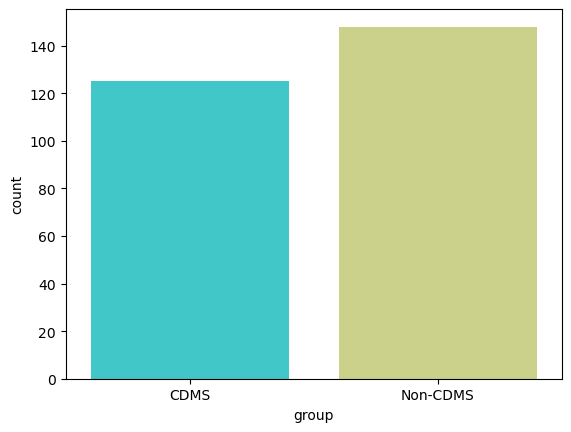

In [23]:
sns.countplot(data = data1, x = 'group', palette='rainbow') # 비율은 비슷하지만 non - CDMS 가 조금 더 높음을 알 수 있다.

<AxesSubplot:xlabel='group', ylabel='count'>

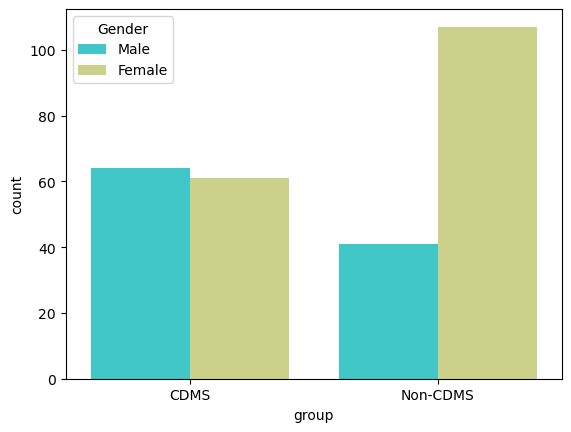

In [24]:
sns.countplot(data = data1, x = 'group', hue = 'Gender', palette='rainbow') # 증상이 이어지지 않는 그룹 중에서는 여성의 비율이 월등히 높음을 알 수 있다.

<AxesSubplot:xlabel='group', ylabel='count'>

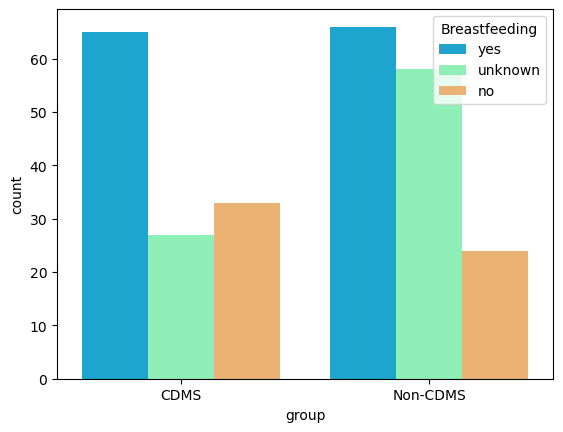

In [25]:
sns.countplot(data = data1, x = 'group', hue = 'Breastfeeding', palette='rainbow') # CDMS로 넘어가는 집단 중에서는 모유 수유 경험이 있다면
                                                                     # 증상으로 많이 넘어감을 알 수 있다.

<AxesSubplot:xlabel='group', ylabel='count'>

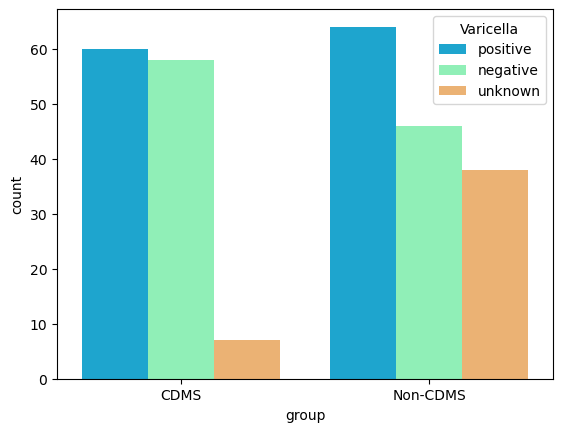

In [26]:
sns.countplot(data = data1, x = 'group', hue = 'Varicella', palette='rainbow') # 두 집단 모두에서 큰 차이가 없어보인다.

<AxesSubplot:xlabel='group', ylabel='count'>

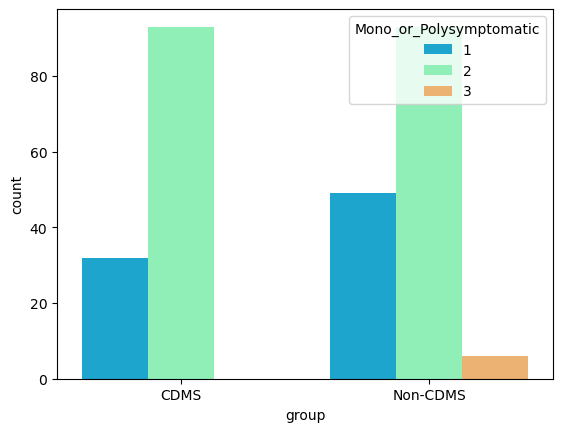

In [27]:
sns.countplot(data = data1, x = 'group', hue = 'Mono_or_Polysymptomatic', palette='rainbow') # 전환이 된 집단에서 두 개이상의 증세를 가지고 있던 사람이 월등히 많다. 

<AxesSubplot:xlabel='group', ylabel='count'>

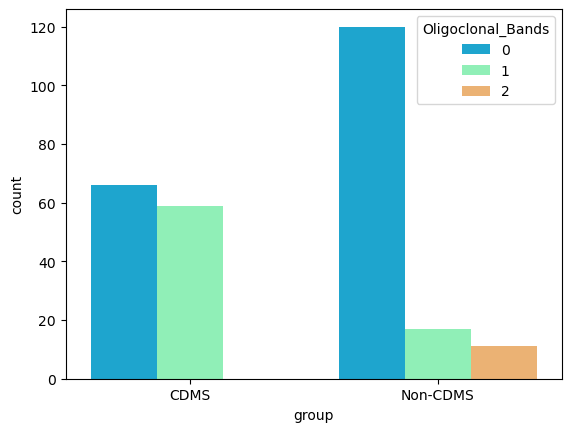

In [28]:
sns.countplot(data = data1, x = 'group', hue = 'Oligoclonal_Bands', palette='rainbow') # 전환이 되지않은 집단에서 이 밴드가 없는 사람이 압도적으로 많은 것을 확인 할 수 있었다.

<AxesSubplot:xlabel='group', ylabel='count'>

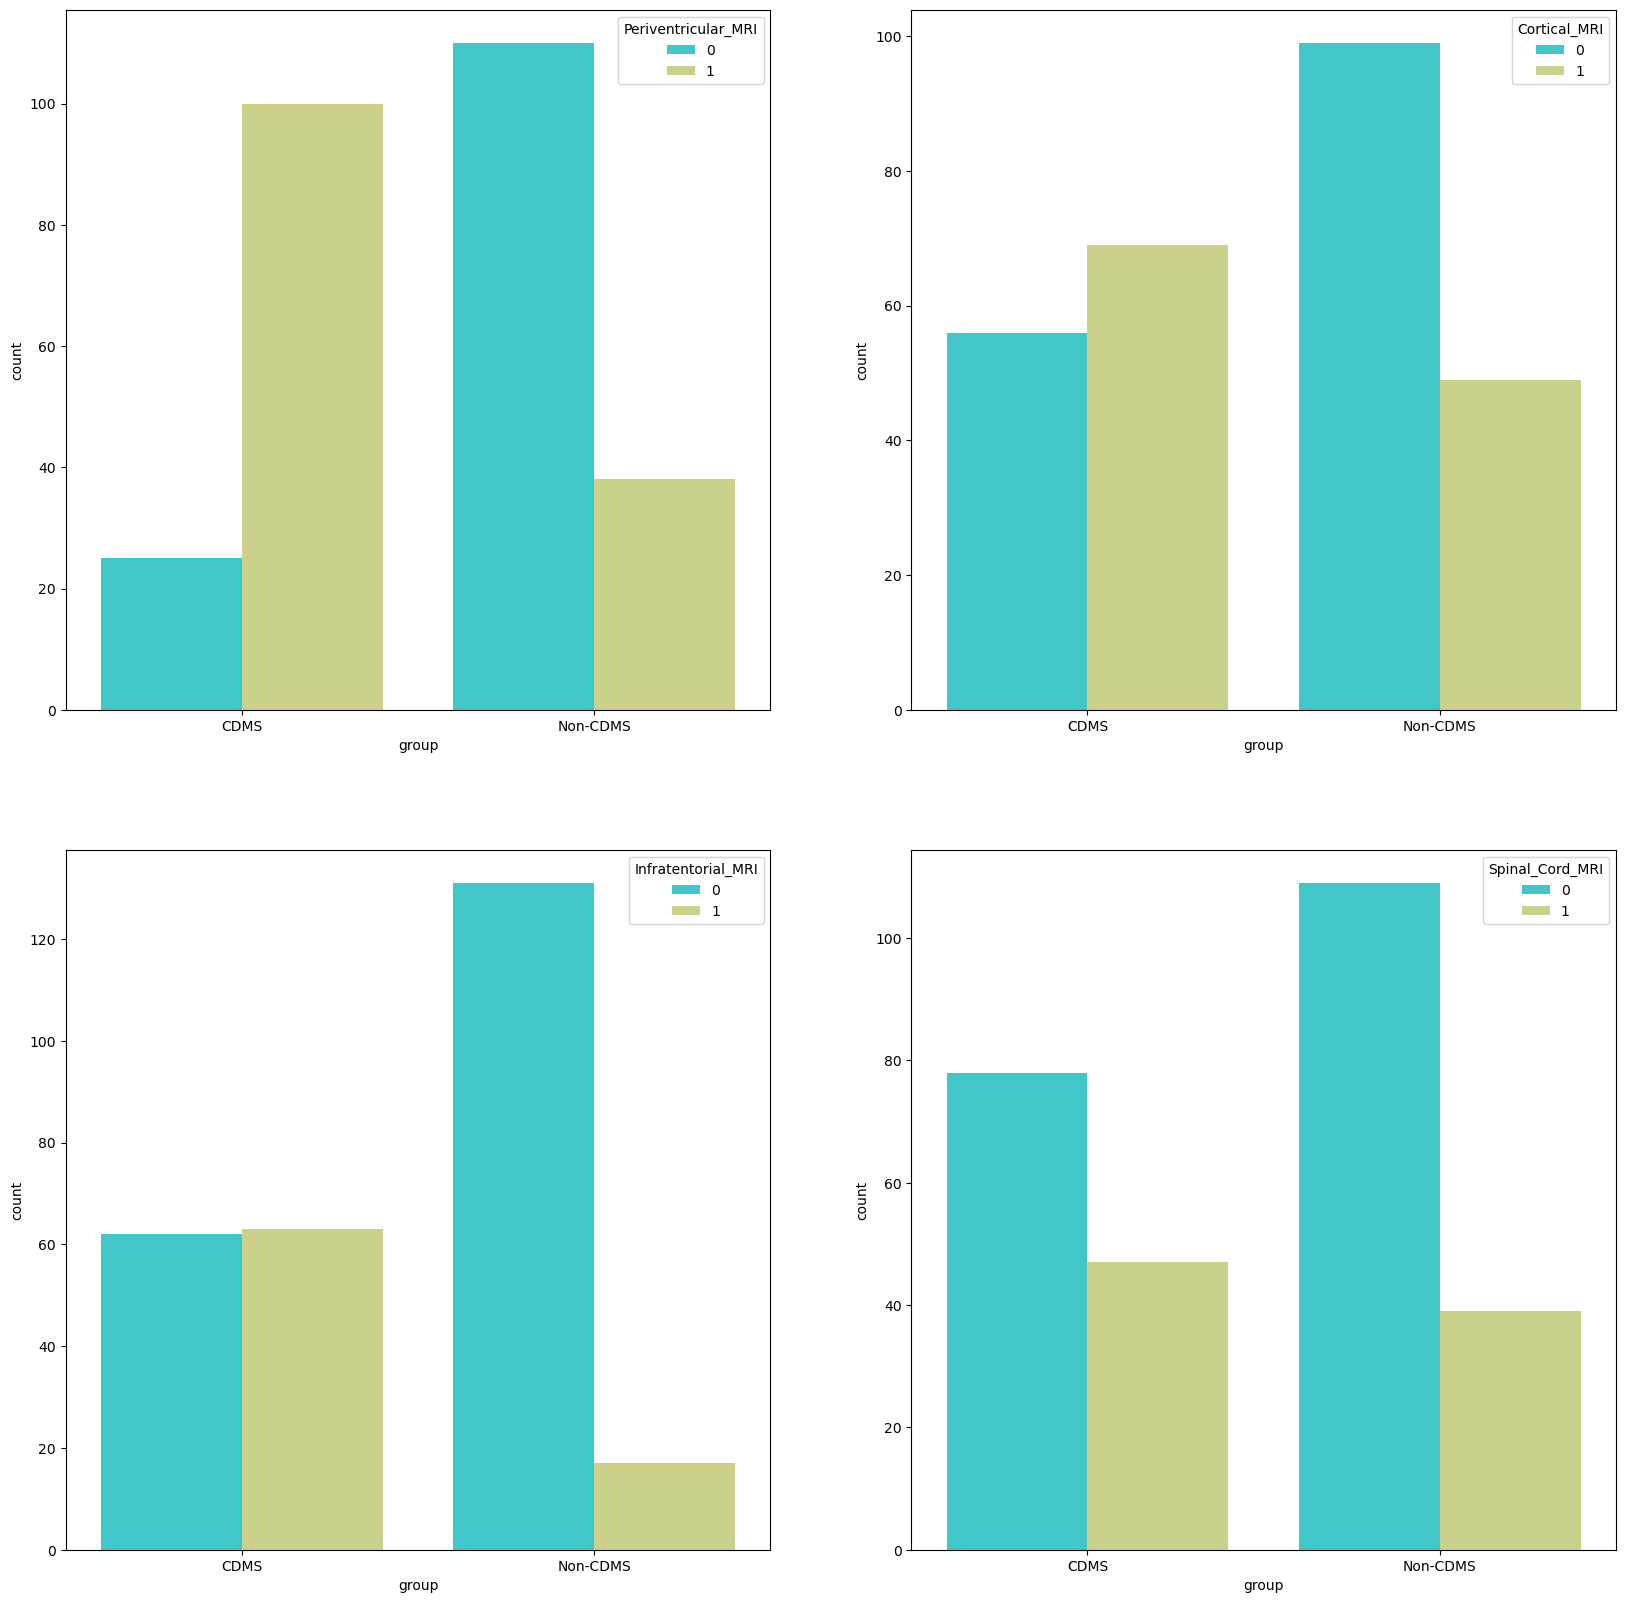

In [29]:
fig, ax = plt.subplots(ncols=2, nrows=2,  figsize=(20,20))

sns.countplot(data = data1, x = 'group', hue = 'Periventricular_MRI', palette='rainbow', ax=ax[0,0])
sns.countplot(data = data1, x = 'group', hue = 'Cortical_MRI', palette='rainbow', ax=ax[0,1])
sns.countplot(data = data1, x = 'group', hue = 'Infratentorial_MRI', palette='rainbow', ax=ax[1,0])
sns.countplot(data = data1, x = 'group', hue = 'Spinal_Cord_MRI', palette='rainbow', ax=ax[1,1])

# MRI에 측정된 증상의 유무에 따른 집단의 결과
# 발현이 된 집단은 애매하지만 발현이 되지 않은 집단에서 MRI를 찍었을 때 음성으로 나오는 것이 확실히 많을 것을 알 수 있다.

In [30]:
data1.corr()

,Age,Schooling,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS
Age,1.000000,-0.155195,0.105278,-0.027001,-0.019016,0.055289,0.088708,0.010566,0.208723,0.031307,0.083082,-0.042061,0.125557,0.048330,0.203237
Schooling,-0.155195,1.000000,0.006962,0.039534,0.006162,-0.018392,-0.061948,0.003169,0.060960,0.015917,0.035049,-0.054171,0.061959,-0.087222,-0.148421
Initial_Symptom,0.105278,0.006962,1.000000,0.525513,0.114455,0.213863,0.250598,0.185577,0.144368,0.328828,0.008021,0.252720,0.237100,0.027463,0.135367
Mono_or_Polysymptomatic,-0.027001,0.039534,0.525513,1.000000,0.092253,0.148275,0.073035,0.194356,0.088145,0.132399,0.021255,0.048598,0.153923,-0.015037,0.037642
Oligoclonal_Bands,-0.019016,0.006162,0.114455,0.092253,1.000000,-0.061697,-0.030713,0.069001,0.093700,0.084930,0.021769,0.018510,0.072548,0.048200,-0.010641
LLSSEP,0.055289,-0.018392,0.213863,0.148275,-0.061697,1.000000,0.599875,0.390263,0.100077,0.183227,0.177415,0.130361,0.342295,0.151524,0.161361
ULSSEP,0.088708,-0.061948,0.250598,0.073035,-0.030713,0.599875,1.000000,0.343948,0.132705,0.211617,0.112482,0.156739,0.264320,0.212519,0.260299
VEP,0.010566,0.003169,0.185577,0.194356,0.069001,0.390263,0.343948,1.000000,0.110702,0.183161,0.203341,0.163638,0.162967,0.090980,0.117350
BAEP,0.208723,0.060960,0.144368,0.088145,0.093700,0.100077,0.132705,0.110702,1.000000,0.026602,0.215116,0.055949,0.074025,-0.080631,0.023569
Periventricular_MRI,0.031307,0.015917,0.328828,0.132399,0.084930,0.183227,0.211617,0.183161,0.026602,1.000000,0.212252,0.330952,-0.023225,0.239255,0.252070


In [31]:
data1.corr() > 0.7 # intial_EDSS, Final_EDSS 가 연관이 굉장히 높게 나온다.. 하지만 결측치가 굉장히 많다.

,Age,Schooling,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS
Age,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Schooling,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Initial_Symptom,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Mono_or_Polysymptomatic,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Oligoclonal_Bands,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
LLSSEP,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
ULSSEP,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
VEP,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
BAEP,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
Periventricular_MRI,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [32]:
data1.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS', 'group'],
      dtype='object')

In [33]:
data['group'].value_counts()

2    148
1    125
Name: group, dtype: int64

<AxesSubplot:>

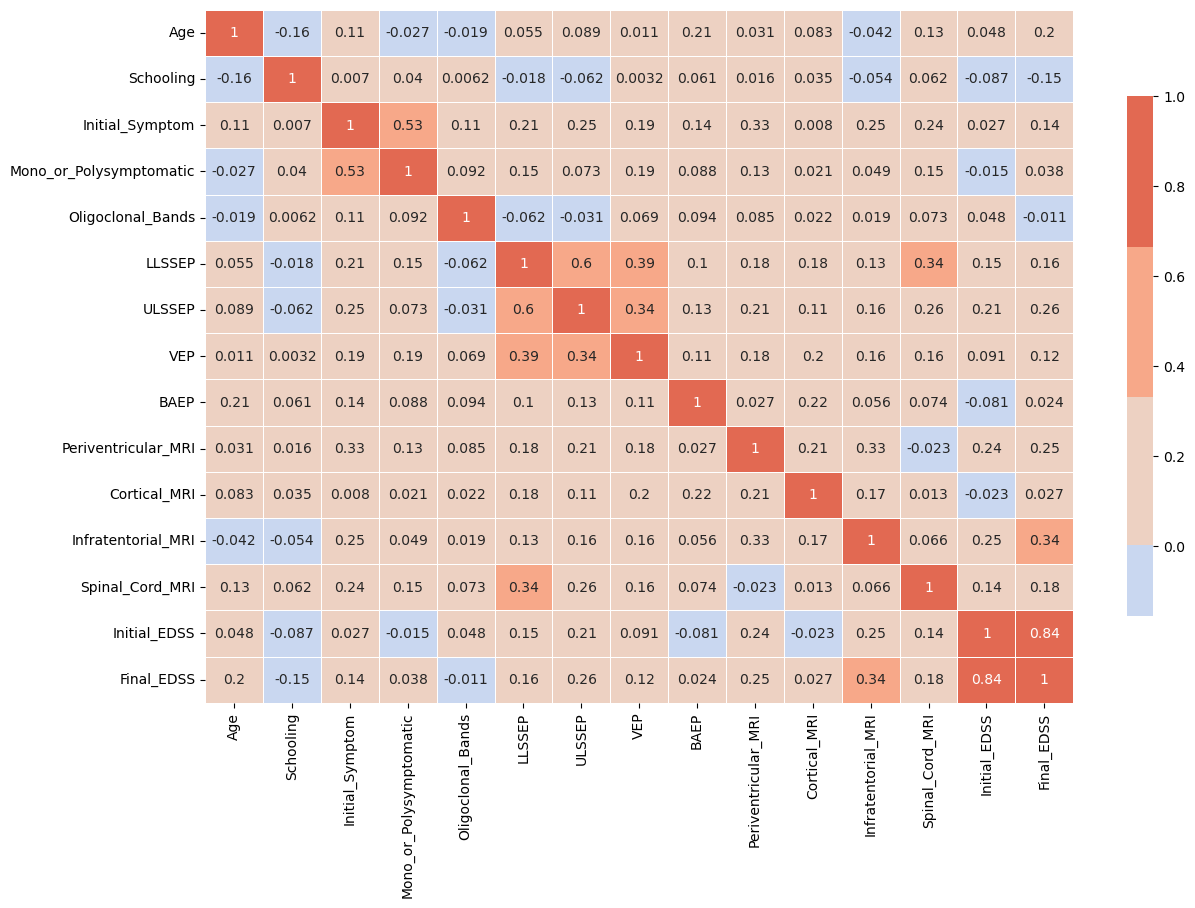

In [34]:
corr = data1.corr()
f, ax = plt.subplots(figsize=(14, 9), facecolor=None)
cmap = sns.color_palette('coolwarm')
sns.heatmap(corr, cmap=cmap, center=0, annot=True, linewidths=.5, cbar_kws={"shrink": 0.75})

In [35]:
data['group'] = data['group'].replace(2, 0)
data.tail()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
268,2,31,8,3,1,9,2,0,0,0,0,0,0,0,0,0,NaN,NaN,0
269,1,21,15,3,3,5,2,1,0,0,0,0,0,0,0,1,NaN,NaN,0
270,2,19,12,3,3,13,2,0,1,1,1,0,0,0,0,1,NaN,NaN,0
271,2,32,15,3,3,15,2,1,1,1,1,0,1,1,1,0,NaN,NaN,0
272,2,77,6,3,3,2,1,0,0,1,0,0,0,0,0,0,NaN,NaN,0


In [36]:
data['group'].value_counts()

0    148
1    125
Name: group, dtype: int64

In [37]:
data2 = data.copy()
data2.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20,1,1,2,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25,3,2,10,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20,3,1,3,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15,1,1,7,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20,2,1,6,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


# 로지스틱 회귀 분석
- 종속변수가 범주형이기에 로지스틱 회귀 분석으로 모델링 진행 예정
- 데이터셋 준비하기 (필요한 column 준비)

In [38]:
# 데이터 준비 
data2.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS', 'group'],
      dtype='object')

In [39]:
interested = ['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'group']

In [40]:
data2 = data2[interested]
data2.to_csv('MSD.csv', index = False) # 필요한 변수만을 모아놓은 csv파일을 새로 생성